# Laboratory #4_1 : Image Classification using CNN

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

**Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Create reusable functions where ever possible, so that the code could be reused at different places.
*   Mount your drive to access the images.
*   Add sufficient comments and explanations wherever necessary.

---

# **Colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

In [1]:
# mount drive to the notebook

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt

from tensorflow import keras

import time
import timeit

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [3]:
# solution

from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test,y_test) = cifar10.load_data()
print('For x')
print(x_train.shape)
print(x_train.ndim)
print(x_train.dtype)
print(y_test.shape)
print(y_train.shape)
print('For y')
print(x_train.shape)
print(x_train.ndim)
print(x_train.dtype)
print(x_test.shape)

170508288/170498071 [==============================] - 7s 0us/step
For x
(50000, 32, 32, 3)
4
uint8
(10000, 1)
(50000, 1)
For y
(50000, 32, 32, 3)
4
uint8
(10000, 32, 32, 3)


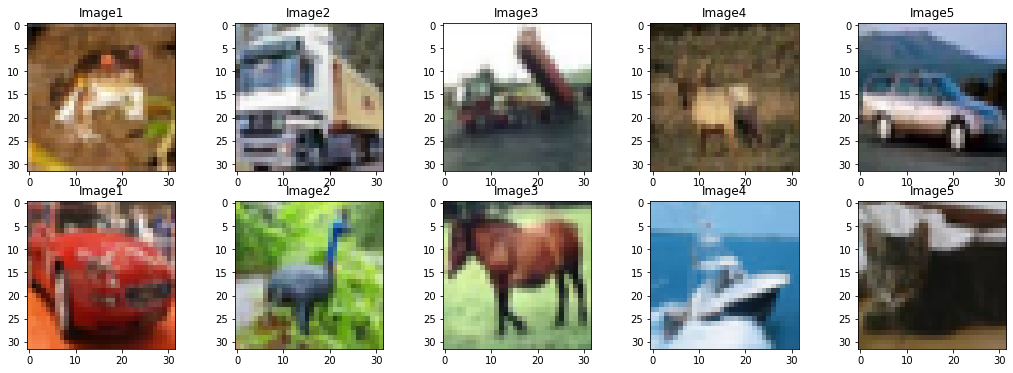

In [4]:
# Visualize cifar10 dataset

import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18,6))

for i in range(5):
  for j in range(2):
    if j == 0:
       axes[j,i].imshow(x_train[i], cmap=plt.get_cmap('gray'))
       axes[j,i].set_title(f'Image{i+1}')
    else:
        axes[j,i].imshow(x_train[i+5], cmap=plt.get_cmap('gray'))
        axes[j,i].set_title(f'Image{i+1}')
plt.show()  

In [5]:
#Normalize data
print(x_train.shape)
print(x_test.shape)
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [10]:
x_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [ ]:
#Convert the labels to one-hot encoded form.
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(y_train.shape)
print(y_test.shape)



(50000, 10)
(10000, 10)


## Define the following model (same as the one in tutorial)

**For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer. Use the input as (32,32,3). The filter maps can then be flattened to provide features to the classifier. Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).**

In [ ]:
from keras.backend import clear_session
clear_session()

In [ ]:
# solution
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
#The first layer we start with a single layer with a small size (3,3) and modest numer of filters (32)
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
#model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='glorot_normal', input_shape=(32, 32, 1)))
# We add a max pooling layer
model.add(MaxPooling2D((2, 2)))
#The filter maps can then be flattened
model.add(Flatten())
#dense layer with 100 units before the classification layer
model.add(Dense(100, activation='relu', kernel_initializer='glorot_normal'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dense (Dense)               (None, 100)               720100    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 722,006
Trainable params: 722,006
Non-trainable params: 0
__________________________________________________

In [12]:
y_train.shape

(50000, 1)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 512 epochs with a batch size of 32.

In [ ]:
# solution
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
t0 = time.time()
history = model.fit(x_train, y_train, batch_size=512, epochs=32, validation_split=0.1)

Epoch 1/32
88/88 [==============================] - 13s 21ms/step - loss: 2.0858 - accuracy: 0.2480 - val_loss: 1.9449 - val_accuracy: 0.3124
Epoch 2/32
88/88 [==============================] - 1s 17ms/step - loss: 1.8908 - accuracy: 0.3330 - val_loss: 1.8812 - val_accuracy: 0.3430
Epoch 3/32
88/88 [==============================] - 1s 16ms/step - loss: 1.8130 - accuracy: 0.3642 - val_loss: 1.7968 - val_accuracy: 0.3684
Epoch 4/32
88/88 [==============================] - 1s 16ms/step - loss: 1.7537 - accuracy: 0.3876 - val_loss: 1.7463 - val_accuracy: 0.3824
Epoch 5/32
88/88 [==============================] - 2s 17ms/step - loss: 1.7059 - accuracy: 0.4062 - val_loss: 1.6978 - val_accuracy: 0.4096
Epoch 6/32
88/88 [==============================] - 1s 16ms/step - loss: 1.6695 - accuracy: 0.4188 - val_loss: 1.6758 - val_accuracy: 0.4158
Epoch 7/32
88/88 [==============================] - 1s 16ms/step - loss: 1.6373 - accuracy: 0.4274 - val_loss: 1.6457 - val_accuracy: 0.4194
Epoch 8/32
8

In [ ]:
print(history.history.keys())   

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


for kernel initializer = he_uniform 


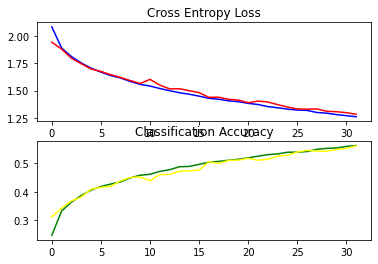

In [ ]:
print('for kernel initializer = he_uniform ')
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='red', label='val')

# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='green', label='train')
plt.plot(history.history['val_accuracy'], color='yellow', label='val')
plt.show()

The next model is implemented a kernel initializer 'Xavier initialization'. This is to compare with the he_normal.

In [ ]:
from keras.backend import clear_session
clear_session()

In [ ]:
model_1 = Sequential()
#The first layer we start with a single layer with a small size (3,3) and modest numer of filters (32)

model_1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='glorot_normal', input_shape=(32, 32, 3)))
# We add a max pooling layer
model_1.add(MaxPooling2D((2, 2)))
#The filter maps can then be flattened
model_1.add(Flatten())
#dense layer with 100 units before the classification layer
model_1.add(Dense(100, activation='relu', kernel_initializer='glorot_normal'))
model_1.add(Dense(10, activation='softmax'))
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dense (Dense)               (None, 100)               720100    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 722,006
Trainable params: 722,006
Non-trainable params: 0
__________________________________________________

In [ ]:
# solution
model_1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
#Training
t0 = time.time()
history2 = model_1.fit(x_train, y_train, batch_size=512, epochs=32, validation_split=0.1)

Epoch 1/32
88/88 [==============================] - 2s 20ms/step - loss: 2.2404 - accuracy: 0.1942 - val_loss: 2.1826 - val_accuracy: 0.2382
Epoch 2/32
88/88 [==============================] - 2s 17ms/step - loss: 2.1268 - accuracy: 0.2535 - val_loss: 2.0744 - val_accuracy: 0.2692
Epoch 3/32
88/88 [==============================] - 1s 16ms/step - loss: 2.0289 - accuracy: 0.2876 - val_loss: 1.9941 - val_accuracy: 0.2944
Epoch 4/32
88/88 [==============================] - 1s 16ms/step - loss: 1.9593 - accuracy: 0.3166 - val_loss: 1.9410 - val_accuracy: 0.3232
Epoch 5/32
88/88 [==============================] - 1s 17ms/step - loss: 1.9108 - accuracy: 0.3349 - val_loss: 1.8951 - val_accuracy: 0.3404
Epoch 6/32
88/88 [==============================] - 2s 17ms/step - loss: 1.8775 - accuracy: 0.3483 - val_loss: 1.8696 - val_accuracy: 0.3470
Epoch 7/32
88/88 [==============================] - 1s 17ms/step - loss: 1.8513 - accuracy: 0.3598 - val_loss: 1.8596 - val_accuracy: 0.3464
Epoch 8/32
88

for kernel initializer = he_uniform 


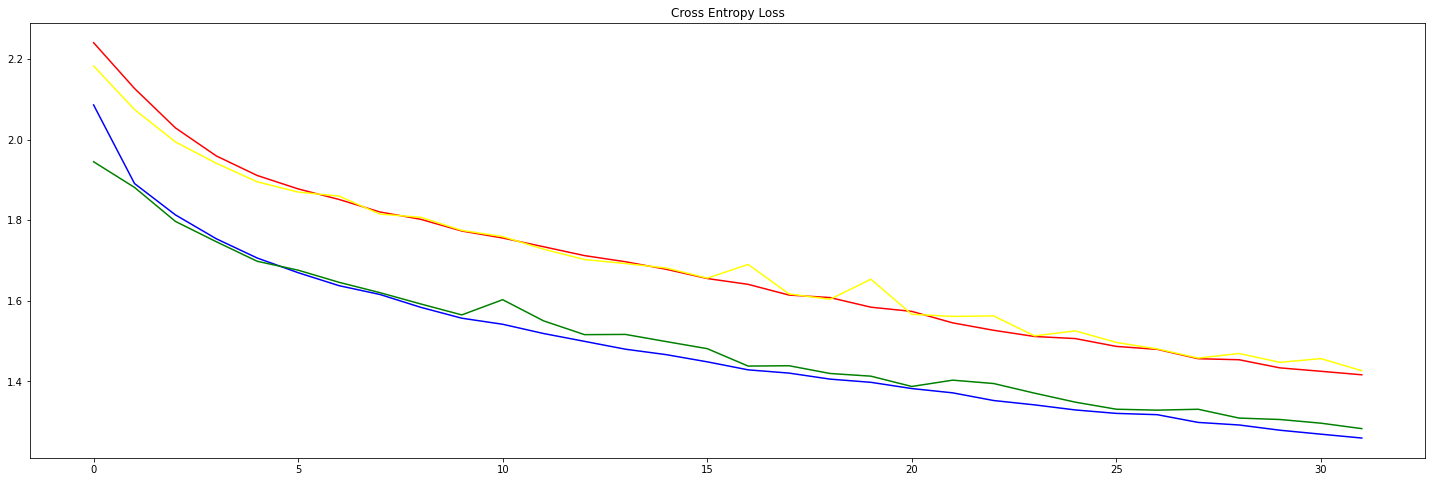

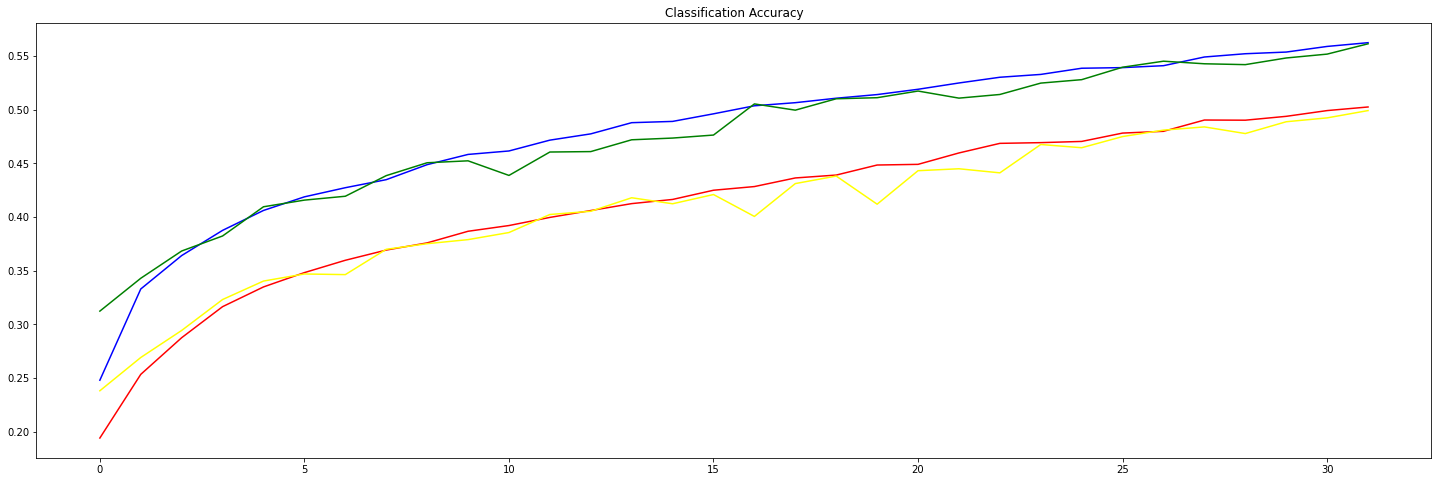

In [ ]:
print('for kernel initializer = he_uniform ')
plt.subplots(figsize=(25, 8))
plt.title('Cross Entropy Loss')

plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='green', label='val')

plt.plot(history2.history['loss'], color='red', label='train')
plt.plot(history2.history['val_loss'], color='yellow', label='val')

# plot accuracy
plt.subplots(figsize=(25, 8))
plt.title('Classification Accuracy')


plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='green', label='val')

plt.plot(history2.history['accuracy'], color='red', label='train')
plt.plot(history2.history['val_accuracy'], color='yellow', label='val')
plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 512 epochs with a batch size of 32. We will use VGG model as the architecture.

**Stack two convolutional layers with 32 filters, each of 3 x 3 followed by max pooling layer. Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. For all the layers, use ReLU activation function. Use same padding for the layers to ensure that the height and width of each layer output matches the input**


In [ ]:
from keras.backend import clear_session
clear_session()


In [ ]:
# solution
inshape = x_train.shape[1:]
model_VGG = Sequential()
model_VGG.add(Conv2D(32,(3,3),activation = 'relu', kernel_initializer = 'he_uniform', input_shape = inshape))
model_VGG.add(MaxPooling2D((2,2)))
#model_VGG.add(Flatten())
model_VGG.add(Conv2D(32,(3,3),activation = 'relu', kernel_initializer = 'he_uniform', input_shape = inshape))
model_VGG.add(MaxPooling2D((2,2)))
model_VGG.add(Flatten())
model_VGG.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model_VGG.add(Dense(10, activation='relu'))
model_VGG.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 128)               1

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 512 epochs with a batch size of 32.

In [ ]:
# solution
# --> Compile the model_VGA
model_VGG.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history_VGG = model.fit(x_train, y_train, batch_size=512, epochs=32,validation_split=0.1)

Epoch 1/32
88/88 [==============================] - 2s 20ms/step - loss: 1.2561 - accuracy: 0.5657 - val_loss: 1.3301 - val_accuracy: 0.5442
Epoch 2/32
88/88 [==============================] - 1s 17ms/step - loss: 1.2434 - accuracy: 0.5685 - val_loss: 1.2773 - val_accuracy: 0.5574
Epoch 3/32
88/88 [==============================] - 2s 17ms/step - loss: 1.2382 - accuracy: 0.5687 - val_loss: 1.2750 - val_accuracy: 0.5546
Epoch 4/32
88/88 [==============================] - 1s 17ms/step - loss: 1.2278 - accuracy: 0.5737 - val_loss: 1.2651 - val_accuracy: 0.5554
Epoch 5/32
88/88 [==============================] - 1s 16ms/step - loss: 1.2146 - accuracy: 0.5794 - val_loss: 1.2580 - val_accuracy: 0.5632
Epoch 6/32
88/88 [==============================] - 1s 16ms/step - loss: 1.2166 - accuracy: 0.5779 - val_loss: 1.2513 - val_accuracy: 0.5616
Epoch 7/32
88/88 [==============================] - 2s 17ms/step - loss: 1.2060 - accuracy: 0.5832 - val_loss: 1.2483 - val_accuracy: 0.5638
Epoch 8/32
88

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.
 

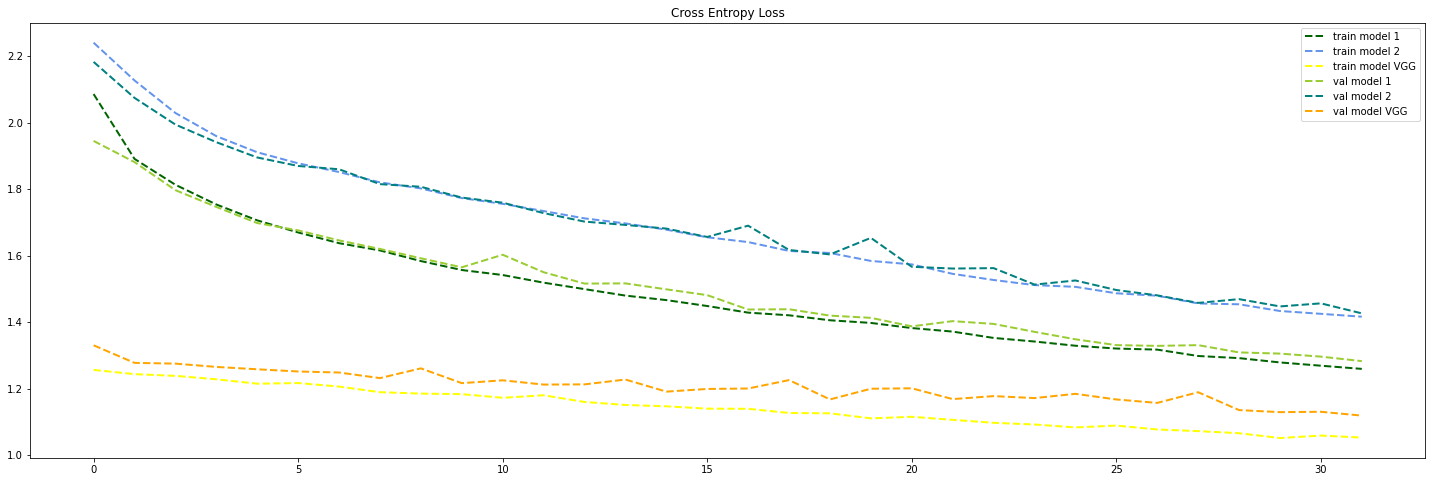

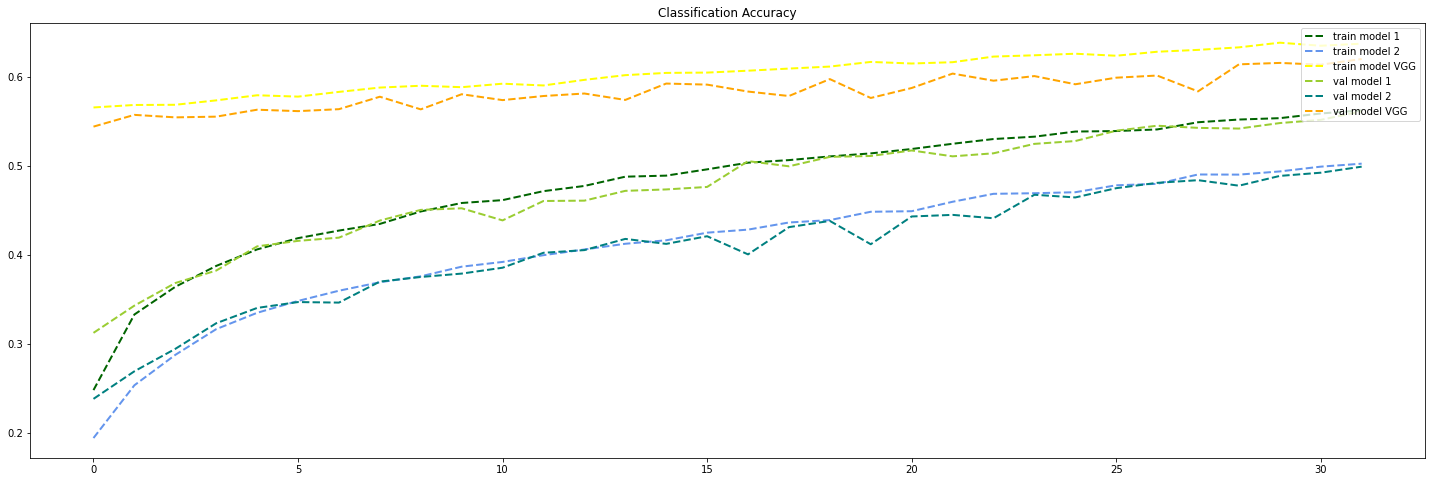

In [ ]:
plt.subplots(figsize=(25, 8))
plt.title('Cross Entropy Loss')

plt.plot(history.history['loss'], color='darkgreen', label='train model 1', linewidth=2, linestyle='dashed')
plt.plot(history2.history['loss'], color = 'cornflowerblue', label = 'train model 2', linewidth=2, linestyle='dashed')
plt.plot(history_VGG.history['loss'], color = 'yellow', label = 'train model VGG', linewidth=2, linestyle='dashed')


plt.plot(history.history['val_loss'], color='yellowgreen', label='val model 1', linewidth=2, linestyle='dashed')
plt.plot(history2.history['val_loss'], color = 'teal', label = 'val model 2', linewidth=2, linestyle='dashed')
plt.plot(history_VGG.history['val_loss'], color = 'orange', label = 'val model VGG', linewidth=2, linestyle='dashed')

plt.legend(loc="upper right")

plt.subplots(figsize=(25, 8))

plt.title('Classification Accuracy')

plt.plot(history.history['accuracy'], color ='darkgreen', label = 'train model 1', linewidth=2, linestyle='dashed')
plt.plot(history2.history['accuracy'],color = 'cornflowerblue', label = 'train model 2', linewidth=2, linestyle='dashed')
plt.plot(history_VGG.history['accuracy'], color = 'yellow', label = 'train model VGG', linewidth=2, linestyle='dashed')



plt.plot(history.history['val_accuracy'], color ='yellowgreen', label = 'val model 1', linewidth=2, linestyle='dashed')
plt.plot(history2.history['val_accuracy'],color = 'teal', label = 'val model 2', linewidth=2, linestyle='dashed')
plt.plot(history_VGG.history['val_accuracy'], color = 'orange', label = 'val model VGG', linewidth=2, linestyle='dashed')

plt.legend(loc="upper right")

plt.show()


**Solution**

*As is apreciated in the previous plot, the better model is the the VGG, because present the results with less loss: 1.0526 and val_loss: 1.1187, otherwise, its accuracy is the best with 0.6374 and val_accuracy: 0.6202*

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


In [ ]:
# solution predict function

import numpy as np
predictions_1 = model.predict(x_test)
predictions_2 = model_1.predict(x_test)
predictions_VGG = model_VGG.predict(x_test)

print(predictions_1.shape)
print(predictions_2.shape)
print(predictions_VGG.shape)

predictions1 = np.argmax(predictions_1, axis=1)
predictions2 = np.argmax(predictions_2, axis=1)
predictionsVGG = np.argmax(predictions_VGG, axis=1)

(10000, 10)
(10000, 10)
(10000, 10)


In [ ]:
from sklearn.metrics import confusion_matrix
gt = np.argmax(y_test, axis=1)
cf1 = confusion_matrix(gt, predictions1)
cf2 = confusion_matrix(gt, predictions2)
cfVGG = confusion_matrix(gt, predictionsVGG)

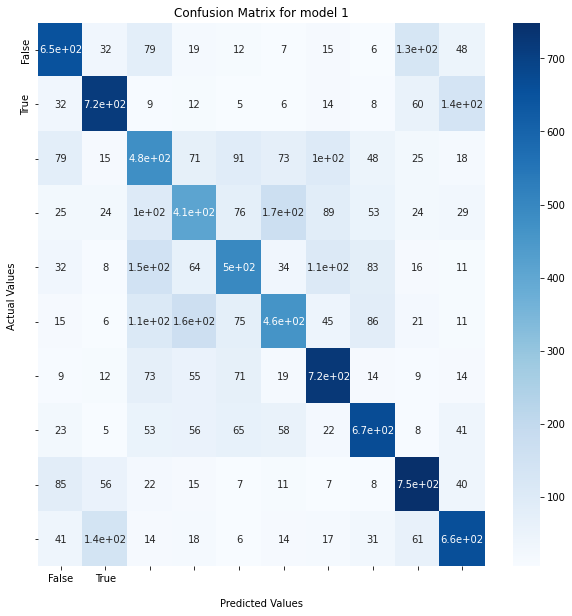

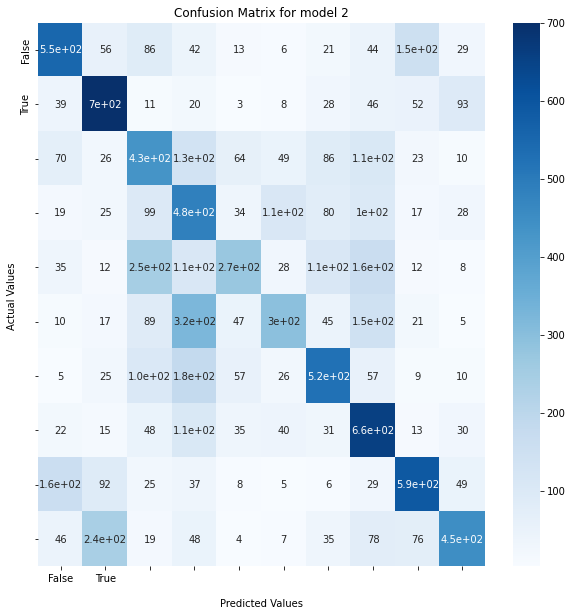

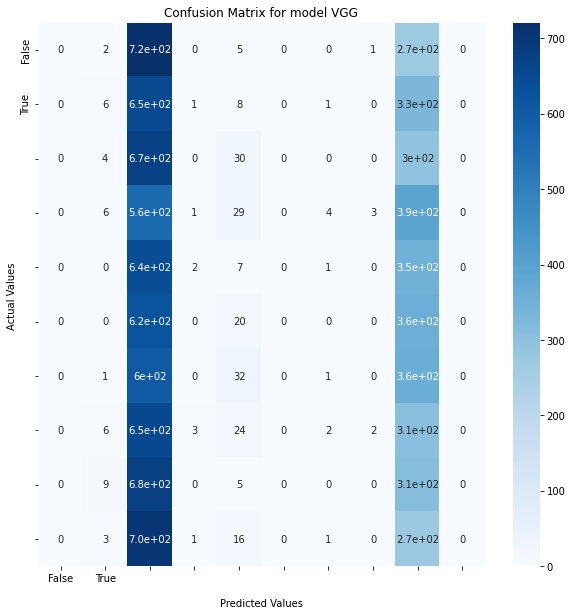

In [ ]:
# solution confusion matrix
import seaborn as sns


## Confussion matrix model 1
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(cf1, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix for model 1');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()




## Confussion matrix model 2
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(cf2, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix for model 2');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()




## Confussion matrix model 3
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(cfVGG, annot=True, cmap='Blues')



ax.set_title('Confusion Matrix for model VGG');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

*    Print the test accuracy for the trained model.

In [ ]:
# solution

test_loss, test_acc = model.evaluate(x_test, y_test)
test_loss1, test_acc1 = model_1.evaluate(x_test,y_test)
test_loss_VGG, test_acc_VGG = model_VGG.evaluate(x_test,y_test)

print('\n')
print('\n')

print('Test loss for model 1: ', test_loss)
print('Test loss for model 2: ', test_loss1)
print('Test loss for model VGG: ', test_loss_VGG)
print('\n')
print('\n')
print('Test accuracy for model 1: ', test_acc)
print('Test accuracy for model 2: ', test_acc1)
print('Test accuracy for model VGG: ', test_acc_VGG)

313/313 [==============================] - 1s 4ms/step - loss: 6.9491 - accuracy: 0.0998




Test loss for model 1:  1.1323425769805908
Test loss for model 2:  1.4178175926208496
Test loss for model VGG:  6.949103832244873




Test accuracy for model 1:  0.6017000079154968
Test accuracy for model 2:  0.49549999833106995
Test accuracy for model VGG:  0.0997999981045723


## Define the complete VGG architecture.

**Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer. Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, follwed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling. Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. For all the layers, use ReLU activation function. Use same padding for the layers to ensure that the height and width of each layer output matches the input**

*   Change the size of input to 64 x 64.

In [ ]:
from keras.backend import clear_session
clear_session()

In [ ]:
# solution

# First it is neccesary import the resize library from tensorflow
from tensorflow.keras.layers.experimental.preprocessing import Resizing

VGG_C_model = Sequential()

VGG_C_model.add(Resizing(64,64)) 

# Two convolutional layers with 64 filters each of 3 x 3 followed by max pooling layer.

# First layer
VGG_C_model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='glorot_normal', input_shape=(32, 32, 3)))
VGG_C_model.add(MaxPooling2D((2,2)))

# Second layer
VGG_C_model.add(Conv2D(64,(3,3), activation = 'relu', padding = 'same', kernel_initializer = 'glorot_normal'))
VGG_C_model.add(MaxPooling2D((2,2)))
# Two convolutional layers with 128 filters, each of 3 x 3, followed by max pooling

# Third layer
VGG_C_model.add(Conv2D(128,(3,3), activation = 'relu', padding = 'same', kernel_initializer = 'glorot_normal'))
VGG_C_model.add(MaxPooling2D((2,2)))

# Fourth layer
VGG_C_model.add(Conv2D(128,(3,3), activation = 'relu', padding = 'same', kernel_initializer = 'glorot_normal'))
VGG_C_model.add(MaxPooling2D((2,2)))

# Two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling

# Fifth layer
VGG_C_model.add(Conv2D(256,(3,3), activation = 'relu', kernel_initializer = 'glorot_normal', padding = 'same'))
VGG_C_model.add(MaxPooling2D((2,2)))

# Sexth layer
VGG_C_model.add(Conv2D(256,(3,3), activation = 'relu', kernel_initializer = 'glorot_normal', padding = 'same'))
VGG_C_model.add(MaxPooling2D((2,2)))

# Flatten the output of the previous layer
VGG_C_model.add(Flatten())

# Dense layer with 128 units before the classification layer.
VGG_C_model.add(Dense(128, activation = 'relu', kernel_initializer = 'glorot_normal'))
#For the 10 classes from the dataset
VGG_C_model.add(Dense(10, activation='softmax'))

#Build our model
VGG_C_model.build([None, 32,32,3])
#Let's check our neural network with all VGG architecture

VGG_C_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 64, 64, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       7

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 100 epochs with a batch size of 32.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [ ]:
# solution
# --> Compile the VGG architecture complete.Also compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
VGG_C_model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#Train he model for 100 epochs with a batch size of 32.
history_VGG_C = model.fit(x_train, y_train, batch_size = 32 , epochs= 100, validation_split=0.1 )

Epoch 1/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.1258 - accuracy: 0.6070 - val_loss: 1.5496 - val_accuracy: 0.4522
Epoch 2/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.0497 - accuracy: 0.6355 - val_loss: 1.1405 - val_accuracy: 0.6010
Epoch 3/100
1407/1407 [==============================] - 8s 6ms/step - loss: 0.9895 - accuracy: 0.6574 - val_loss: 1.0750 - val_accuracy: 0.6312
Epoch 4/100
1407/1407 [==============================] - 8s 6ms/step - loss: 0.9384 - accuracy: 0.6762 - val_loss: 1.1887 - val_accuracy: 0.5946
Epoch 5/100
1407/1407 [==============================] - 8s 6ms/step - loss: 0.8911 - accuracy: 0.6920 - val_loss: 1.1222 - val_accuracy: 0.6082
Epoch 6/100
1407/1407 [==============================] - 8s 6ms/step - loss: 0.8466 - accuracy: 0.7091 - val_loss: 1.1637 - val_accuracy: 0.6064
Epoch 7/100
1407/1407 [==============================] - 8s 6ms/step - loss: 0.8041 - accuracy: 0.7268 - val_loss: 1.3451 - val_ac

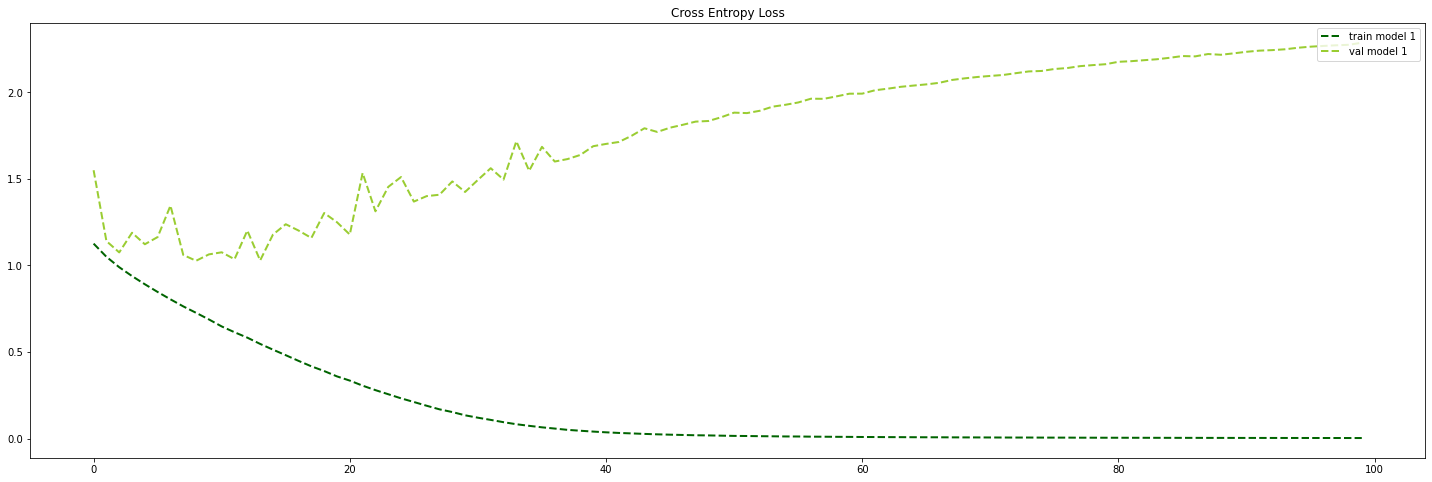

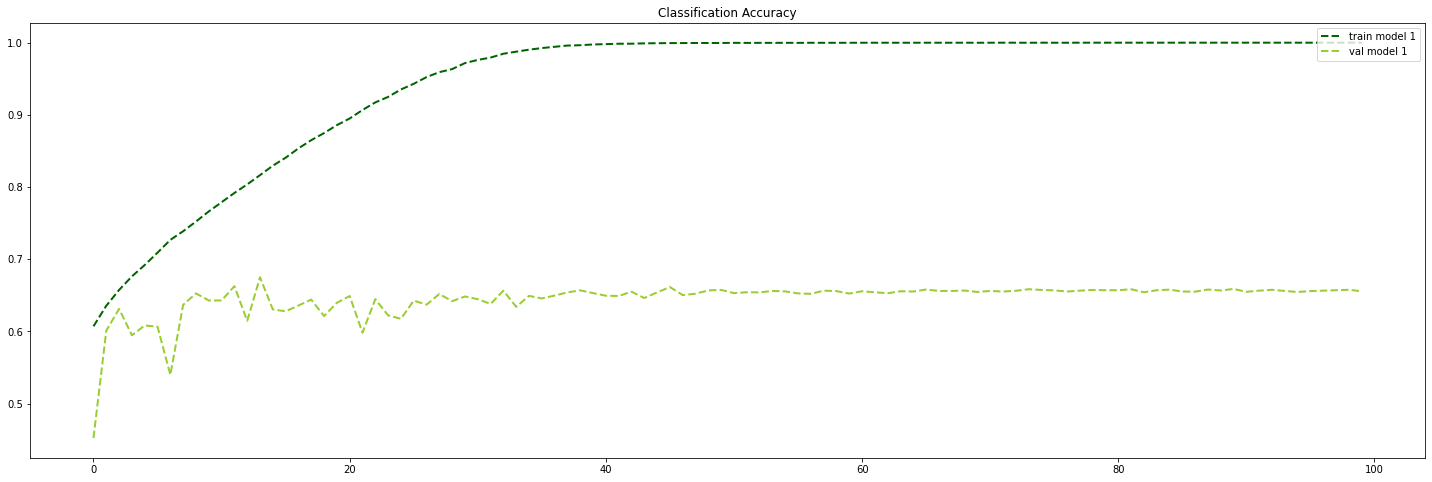

In [ ]:
plt.subplots(figsize=(25, 8))
plt.title('Cross Entropy Loss')

plt.plot(history_VGG_C.history['loss'], color='darkgreen', label='train model 1', linewidth=2, linestyle='dashed')
plt.plot(history_VGG_C.history['val_loss'], color='yellowgreen', label='val model 1', linewidth=2, linestyle='dashed')


plt.legend(loc="upper right")

plt.subplots(figsize=(25, 8))

plt.title('Classification Accuracy')

plt.plot(history_VGG_C.history['accuracy'], color ='darkgreen', label = 'train model 1', linewidth=2, linestyle='dashed')
plt.plot(history_VGG_C.history['val_accuracy'], color ='yellowgreen', label = 'val model 1', linewidth=2, linestyle='dashed')

plt.legend(loc="upper right")

plt.show()

In [ ]:
# Predict the output for the test split 
predictions_VGG_C = VGG_C_model.predict(x_test)
print(predictions_VGG_C.shape)
predictionsVGG_C = np.argmax(predictions_VGG_C, axis=1)


(10000, 10)


In [ ]:
gt = np.argmax(y_test, axis=1)
VGG_C = confusion_matrix(gt, predictionsVGG_C)


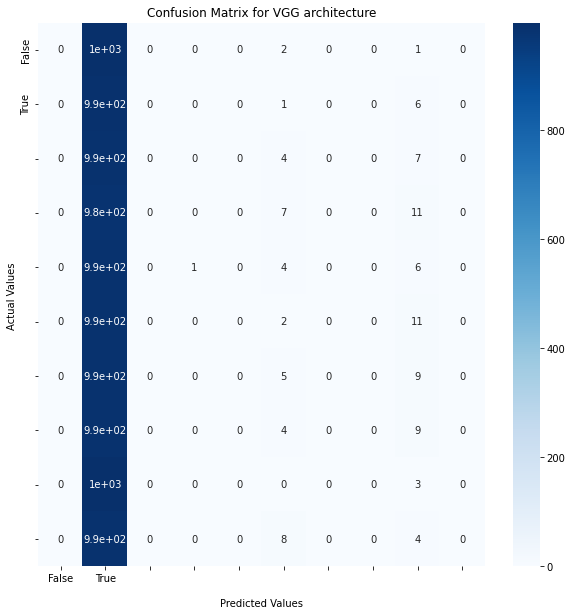

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(VGG_C, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix for VGG architecture');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Solution**

*The activation function has as the main purpose to limit the amplitude in the output in each neuron, in other words, control the range and transform the signals for some finite value. The activation function purpose is to add non-linearity to the neural network

In the architecture, the activation function transform the sum weight provides in the input, to fed the next hidden layer or the output layer.

As is mentioned in the book of Neural Networks and Learning Machines, the activation function have two  basic types, the threshold function and the sigmoid function or we can classify in Binary Step function, linear activation function and non-linear activation function . 

Also, we known that the difference between a sigmoid function  and the softmax, is that the last calculated the relative probabilities of each class and is a combination of multiple sigmoids, typically is used in the las layer of a neural network in classification situations.


The difference between categorical crossentropy and binary crossentropy loss is that the last mentioned is used for binary classification and the other is for multi class classification.
*

...


---

## **End of P4_1: Image Classification using CNN**
Deadline for P4_1 submission in CampusVirtual is: **Monday, the 29th of November, 2021**